# Exercise 04 : Histogram

## Imports

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Create a graph like this
- create two lists of values (for working days and for weekends) for the histogram input
- the figsize is still the same, you can choose the fontsize as well as the color palette
- use a level of transparency for the histogram in front equal to 0.7

## Make a connection to the database

In [3]:
sql_con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get commits datetimes

In [4]:
query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

commits = pd.read_sql(query, sql_con, parse_dates=['datetime'])
commits

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## Calculating daytype

In [5]:
commits['daytype'] = commits['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
commits

,datetime,daytype
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


## Calculating average counts per hour

In [6]:
commits['hour'] = commits['datetime'].dt.hour
commits

,datetime,daytype,hour
0,2020-04-17 05:19:02.744528,working_day,5
1,2020-04-17 05:22:35.249331,working_day,5
2,2020-04-17 05:22:45.549397,working_day,5
3,2020-04-17 05:34:14.691200,working_day,5
4,2020-04-17 05:34:24.422370,working_day,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,working_day,20
3203,2020-05-21 20:22:41.785725,working_day,20
3204,2020-05-21 20:22:41.877806,working_day,20
3205,2020-05-21 20:37:00.129678,working_day,20


## Creating graph

In [7]:
data = [commits[commits['daytype'] == 'working_day']['hour'].tolist(),
        commits[commits['daytype'] == 'weekend']['hour'].tolist()]

[]

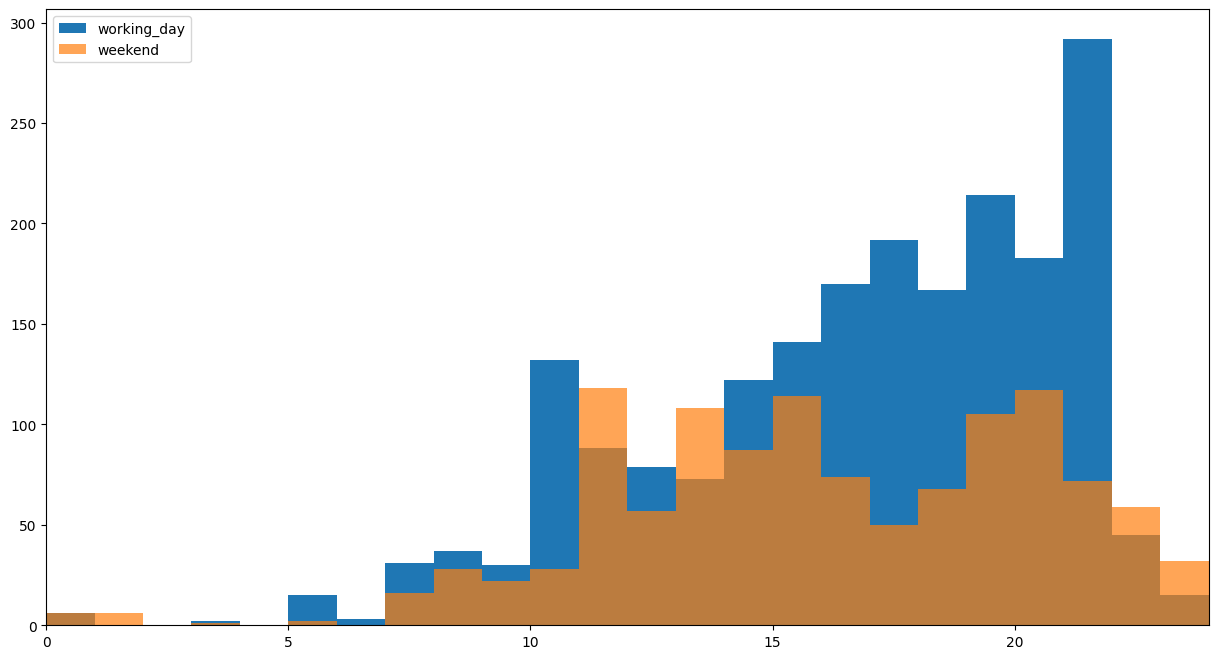

In [8]:
plt.figure(figsize=(15,8))

plt.hist(x=data[0],
         bins=range(0, 25),
         range=[0, 24]
        )

plt.hist(x=data[1],
         bins=range(0, 25),
         range=[0, 24],
         alpha=0.7
        )

plt.legend(['working_day', 'weekend'])
plt.xlim(0,24)
plt.plot()

## Close the connection to the database

In [9]:
sql_con.close()

## Are there hours when the total number of commits was higher on weekends than on working days?
The answer is: yes.
For example: 11, 13, 22, 23